<a href="https://colab.research.google.com/github/tkys/catboost_url_phishing/blob/master/catboost_URL_phishing_(%E4%BA%8C%E5%80%A4%E5%88%86%E9%A1%9E%E5%95%8F%E9%A1%8C)_ipynb_datatype%3Dobject_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://github.com/surajr/URL-Classification/blob/master/URL%20Classification.ipynb

In [0]:
!git clone https://github.com/surajr/URL-Classification.git

Cloning into 'URL-Classification'...
remote: Enumerating objects: 18, done.
remote: Total 18 (delta 0), reused 0 (delta 0), pack-reused 18
Unpacking objects: 100% (18/18), done.


In [0]:
! pip install catboost scikit-learn

     |████████████████████████████████| 61.9MB 1.2MB/s 


In [0]:
!pip install tldextract
!pip install whois

     |████████████████████████████████| 51kB 3.5MB/s 
  Created wheel for whois: filename=whois-0.9.3-cp36-none-any.whl size=7643 sha256=662acdfa501e12d23d54c6fcf39c5c046ec5e315ae6e4a9eaf118f9af6c10fa5
  Stored in directory: /root/.cache/pip/wheels/2d/8e/cf/34c600dd29f2304b2526eddcb79ffdc1b1f5e1f5a7059a8d7a
Successfully built whois


In [0]:
import os
import sys
import re
import matplotlib
import pandas as pd
import numpy as np
from os.path import splitext
import ipaddress as ip
import tldextract
import whois
import datetime
from urllib.parse import urlparse

In [0]:
% cd /content/URL-Classification/

/content/URL-Classification


In [0]:
df = pd.read_csv("./dataset_url.csv")

#df=df.sample(frac=1)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,URL,Label
0,https://www.nttdocomo.co.jp/utility/privacy/,0
1,https://www.nttdocomo.co.jp/,0
2,http://www.nttdocomo-smt-contacts.com/,1
3,http://jpfhbk.funnybunny.xyz/live/?uid=8683327...,2
4,http://www.nttdocomo-smt-contacts.com/,1


In [0]:
len(df) #displaying 5 records

4891

In [0]:
#2016's top most suspicious TLD and words

Suspicious_TLD=['zip','cricket','link','work','party','gq','kim','country','science','tk']

Suspicious_Domain=['luckytime.co.kr','mattfoll.eu.interia.pl','trafficholder.com','dl.baixaki.com.br','bembed.redtube.comr','tags.expo9.exponential.com','deepspacer.com','funad.co.kr','trafficconverter.biz']

#trend micro's top malicious domains

Hackers can use long URL to hide the doubtful part in the address bar. 


ハッカーは長いURLを使ってアドレスバーの疑わしい部分を隠すことができます。

For example: http://federmacedoadv.com.br/3f/aze/ab51e2e319e51502f416dbe46b773a5e/?cmd=_home&dispatch=11004d58f5b74f8dc1e7c2e8dd4105e811004d58f5b74f8dc1e7c2e8dd4105e8@phishing.website.html

In [0]:
# Method to count number of dots  ドット数
def countdots(url):  
    return url.count('.')


In [0]:
# Method to count number of delimeters  区切りの数を数える
def countdelim(url):
    count = 0
    delim=[';','_','?','=','&']
    for each in url:
        if each in delim:
            count = count + 1
    
    return count

If an IP address is used as an alternative of the domain name in the URL, 

URLのドメイン名の代わりにIPアドレスが使用されている場合


such as “http://125.98.3.123/fake.html”, users can be sure that someone is trying to steal their personal information. 


「http://125.98.3.123/fake.html」
のように、ユーザーは誰かが自分の個人情報を盗もうとしていることを確認できます。


Sometimes, the IP address is even transformed into hexadecimal code as shown in the following link “http://0x58.0xCC.0xCA.0x62/2/paypal.ca/index.html”.

「http：//0x58.0xCC.0xCA.0x62/2/paypal.ca/index.html」に示すように、IPアドレスが16進コードに変換されることもあります。

In [0]:
# Is IP addr present as th hostname, let's validate   IPアドレスがホスト名として存在するかどうかを検証しましょう。

import ipaddress as ip #works only in python 3

def isip(uri):
    try:
        if ip.ip_address(uri):
            return 1
    except:
        return 0

In [0]:
#method to check the presence of hyphens ハイフンの存在を確認

def isPresentHyphen(url):
    return url.count('-')

Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol.


URLで「@」記号を使用すると、ブラウザは「@」記号より前のすべてを無視し、実際のアドレスは「@」記号の後に続くことがよくあります。

In [0]:
#method to check the presence of @  @の存在を確認

def isPresentAt(url):
    return url.count('@')

The existence of “//” within the URL path means that the user will be redirected to another website. An example of such URL’s is: “http://www.legitimate.com//http://www.phishing.com”. We examine the presence of “//”


URLパス内に「//」があることは、ユーザーが別のWebサイトにリダイレクトされることを意味します。

そのようなURLの例は、「http://www.legitimate.com//http://www.phishing.com」です。 “ //”の存在を調べる

In [0]:
def isPresentDSlash(url):
    return url.count('//')

In [0]:
def countSubDir(url):
    return url.count('/')

In [0]:
def get_ext(url):
    """Return the filename extension from url, or ''."""  #urlからファイル名拡張子または ''を返します。
    
    root, ext = splitext(url)
    return ext

In [0]:
def countSubDomain(subdomain):   #サブドメイン数チェック
  if not subdomain:
        return 0
  else:
        return len(subdomain.split('.'))

In [0]:
def countQueries(query): #クエリー数チェック
    if not query:
        return 0
    else:
        return len(query.split('&'))

In [0]:
'''
featureSet = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at',\
'presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','presence of Suspicious_TLD',\
'presence of suspicious domain','create_age(months)','expiry_age(months)','update_age(days)','country','file extension','label'))'''

featureSet = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at',\
'presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','presence of Suspicious_TLD',\
'presence of suspicious domain','label'))

In [0]:
from urllib.parse import urlparse
import tldextract
def getFeatures(url, label): 
    result = []
    url = str(url)
    
    #add the url to feature set
    result.append(url)
    
    #parse the URL and extract the domain information
    path = urlparse(url)
    ext = tldextract.extract(url)
    
    #counting number of dots in subdomain    
    result.append(countdots(ext.subdomain))
    
    #checking hyphen in domain   
    result.append(isPresentHyphen(path.netloc))
    
    #length of URL    
    result.append(len(url))
    
    #checking @ in the url    
    result.append(isPresentAt(path.netloc))
    
    #checking presence of double slash    
    result.append(isPresentDSlash(path.path))
    
    #Count number of subdir    
    result.append(countSubDir(path.path))
    
    #number of sub domain    
    result.append(countSubDomain(ext.subdomain))
    
    #length of domain name    
    result.append(len(path.netloc))
    
    #count number of queries    
    result.append(len(path.query))
    
    #Adding domain information
    
    #if IP address is being used as a URL     
    result.append(isip(ext.domain))
    
    #presence of Suspicious_TLD
    result.append(1 if ext.suffix in Suspicious_TLD else 0)
    
    #presence of suspicious domain
    result.append(1 if '.'.join(ext[1:]) in Suspicious_Domain else 0 )
     
    '''
      
    #Get domain information by asking whois
    domain = '.'.join(ext[1:])
    w = whois.whois(domain)
    
    avg_month_time=365.2425/12.0
    
                  
    #calculate creation age in months
                  
    if w.creation_date == None or type(w.creation_date) is str :
        result.append(-1)
        #training_df['create_age(months)'] = -1
    else:
        if(type(w.creation_date) is list): 
            create_date=w.creation_date[-1]
        else:
            create_date=w.creation_date

        if(type(create_date) is datetime.datetime):
            today_date=datetime.datetime.now()
            create_age_in_mon=((today_date - create_date).days)/avg_month_time
            create_age_in_mon=round(create_age_in_mon)
            result.append(create_age_in_mon)
            #training_df['create_age(months)'] = create_age_in_mon
            
        else:
            result.append(-1)
            #training_df['create_age(months)'] = -1
    
    #calculate expiry age in months
                  
    if(w.expiration_date==None or type(w.expiration_date) is str):
        #training_df['expiry_age(months)'] = -1
        result.append(-1)
    else:
        if(type(w.expiration_date) is list):
            expiry_date=w.expiration_date[-1]
        else:
            expiry_date=w.expiration_date
        if(type(expiry_date) is datetime.datetime):
            today_date=datetime.datetime.now()
            expiry_age_in_mon=((expiry_date - today_date).days)/avg_month_time
            expiry_age_in_mon=round(expiry_age_in_mon)
            #training_df['expiry_age(months)'] = expiry_age_in_mon
            #### appending  in months Appended to the Vector
            result.append(expiry_age_in_mon)
        else:
            #training_df['expiry_age(months)'] = -1
            result.append(-1)#### expiry date error so append -1

    #find the age of last update
                  
    if(w.updated_date==None or type(w.updated_date) is str):
        #training_df['update_age(days)'] = -1
        result.append(-1)
    else:
        if(type(w.updated_date) is list):
            update_date=w.updated_date[-1]
        else:
            update_date=w.updated_date
        if(type(update_date) is datetime.datetime):
            today_date=datetime.datetime.now()
            update_age_in_days=((today_date - update_date).days)
            result.append(update_age_in_days)
            #training_df['update_age(days)'] = update_age_in_days #### appending updated age in days Appended to the Vector
        else:
            result.append(-1)
            #training_df['update_age(days)'] = -1
    
    #find the country who is hosting this domain
    if(w.country == None):
        #training_df['country'] = "None"
        result.append("None")
    else:
        #training_df['country'] = w.country
        result.append(w.country)
     ''' 
    
    #result.append(get_ext(path.path))
    result.append(str(label))
    return result
                  
    #Yay! finally done!

a phishing website lives for a short period of time, we believe that trustworthy domains are regularly paid for several years in advance. But whois server takes few requests per day. So I commented out for now.

フィッシングWebサイトは短期間存続します、私たちは信頼できるドメインが定期的に前に数年間支払われると信じています。しかし、Whoisサーバーは1日あたりのリクエスト数が少ないです。だから私は今のところコメントしています。

In [0]:
for i in range(len(df)):
    features = getFeatures(df["URL"].loc[i], df["Label"].loc[i])    
    featureSet.loc[i] = features

In [0]:
featureSet.head()


,url,no of dots,presence of hyphen,len of url,presence of at,presence of double slash,no of subdir,no of subdomain,len of domain,no of queries,is IP,presence of Suspicious_TLD,presence of suspicious domain,label
0,https://www.nttdocomo.co.jp/utility/privacy/,0,0,44,0,0,3,1,19,0,0,0,0,0
1,https://www.nttdocomo.co.jp/,0,0,28,0,0,1,1,19,0,0,0,0,0
2,http://www.nttdocomo-smt-contacts.com/,0,2,38,0,0,1,1,30,0,0,0,0,1
3,http://jpfhbk.funnybunny.xyz/live/?uid=8683327...,0,0,68,0,0,2,1,21,33,0,0,0,2
4,http://www.nttdocomo-smt-contacts.com/,0,2,38,0,0,1,1,30,0,0,0,0,1


In [0]:
featureSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 4890
Data columns (total 14 columns):
url                              4891 non-null object
no of dots                       4891 non-null object
presence of hyphen               4891 non-null object
len of url                       4891 non-null object
presence of at                   4891 non-null object
presence of double slash         4891 non-null object
no of subdir                     4891 non-null object
no of subdomain                  4891 non-null object
len of domain                    4891 non-null object
no of queries                    4891 non-null object
is IP                            4891 non-null object
presence of Suspicious_TLD       4891 non-null object
presence of suspicious domain    4891 non-null object
label                            4891 non-null object
dtypes: object(14)
memory usage: 573.2+ KB


In [0]:
featureSet.dtypes

url                              object
no of dots                       object
presence of hyphen               object
len of url                       object
presence of at                   object
presence of double slash         object
no of subdir                     object
no of subdomain                  object
len of domain                    object
no of queries                    object
is IP                            object
presence of Suspicious_TLD       object
presence of suspicious domain    object
label                            object
dtype: object

**基本的な使い方 (二値分類問題)**

まずは Breast Cancer データセットを使った二値分類問題を CatBoost で処理してみよう。 以下のサンプルコードでは、CatBoost を学習させた上で汎化性能をホールドアウト検証で確認している。

In [0]:
from catboost import CatBoost
from catboost import Pool

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


In [0]:
# データセットを読み込む
dataset = featureSet

dataset_data = dataset.drop(["url","label"],axis=1)

dataset_target = dataset["label"]

X, y = dataset_data, dataset_target

In [0]:
X.head()

,no of dots,presence of hyphen,len of url,presence of at,presence of double slash,no of subdir,no of subdomain,len of domain,no of queries,is IP,presence of Suspicious_TLD,presence of suspicious domain
0,0,0,44,0,0,3,1,19,0,0,0,0
1,0,0,28,0,0,1,1,19,0,0,0,0
2,0,2,38,0,0,1,1,30,0,0,0,0
3,0,0,68,0,0,2,1,21,33,0,0,0
4,0,2,38,0,0,1,1,30,0,0,0,0


In [0]:
y.head()

0    0
1    0
2    1
3    2
4    1
Name: label, dtype: object

In [0]:
y.groupby(featureSet['label']).size()

label
0    1447
1    2428
2    1016
Name: label, dtype: int64

In [0]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [0]:
# データセットを学習用と検証用に分割する
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        shuffle=True,
                                                        random_state=42,
                                                        stratify=y)


In [0]:
#処理時間計測


import time
start = time.time()

#処理何か

elapsed_time = time.time() - start

print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:5.054473876953125e-05[sec]


In [0]:
# CatBoost が扱うデータセットの形式に直す

train_pool = Pool(X_train, label=y_train)

test_pool = Pool(X_test, label=y_test)


In [0]:
# 学習用のパラメータ
params = {
            # タスク設定と損失関数 binariclssification  #2値分類のとき
            #'loss_function': 'Logloss',
    
            # タスク設定と損失関数 multiclass  #マルチクラス分類のとき
            'loss_function' : 'MultiClass',
    
    
            # 学習ラウンド数
            'num_boost_round': 1000,
    
            # 検証用データの損失が既定ラウンド数減らなかったら学習を打ち切る
            'early_stopping_rounds': 20,
          }


In [0]:
# モデルを学習する

model = CatBoost(params)


# 検証用データ(eval_set)に対する損失を使って学習課程を評価する

# 成果物となるモデルには、それが最も良かったものを使う

model.fit( train_pool, eval_set=[test_pool], use_best_model=True  ) 


0:	learn: 1.0477609	test: 1.0477144	best: 1.0477144 (0)	total: 64.6ms	remaining: 1m 4s
1:	learn: 0.9976776	test: 0.9975312	best: 0.9975312 (1)	total: 78.5ms	remaining: 39.2s
2:	learn: 0.9518750	test: 0.9516321	best: 0.9516321 (2)	total: 92.1ms	remaining: 30.6s
3:	learn: 0.9108561	test: 0.9108268	best: 0.9108268 (3)	total: 106ms	remaining: 26.4s
4:	learn: 0.8713102	test: 0.8713625	best: 0.8713625 (4)	total: 120ms	remaining: 23.9s
5:	learn: 0.8345786	test: 0.8346733	best: 0.8346733 (5)	total: 134ms	remaining: 22.2s
6:	learn: 0.7992779	test: 0.7994372	best: 0.7994372 (6)	total: 148ms	remaining: 21.1s
7:	learn: 0.7696255	test: 0.7698143	best: 0.7698143 (7)	total: 162ms	remaining: 20.1s
8:	learn: 0.7396066	test: 0.7396378	best: 0.7396378 (8)	total: 176ms	remaining: 19.4s
9:	learn: 0.7105151	test: 0.7106817	best: 0.7106817 (9)	total: 190ms	remaining: 18.8s
10:	learn: 0.6853585	test: 0.6856077	best: 0.6856077 (10)	total: 205ms	remaining: 18.5s
11:	learn: 0.6599912	test: 0.6603086	best: 0.6603

In [0]:
# 検証用データを分類する

# NOTE: 判別クラスが欲しなら　prediction_type='Class'　、確率がほしいときは prediction_type='Probability' を使う

start = time.time()

#なかの処理    
y_pred = model.predict(test_pool, prediction_type='Class')


elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")


elapsed_time:0.015414953231811523[sec]


In [0]:
# 検証用データを分類する

# NOTE: 判別クラスが欲しなら　prediction_type='Class'　、確率がほしいときは prediction_type='Probability' を使う

start = time.time()

#なのかの処理    
y_pred_Probability = model.predict(test_pool, prediction_type='Probability')


elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")


elapsed_time:0.013818979263305664[sec]


In [0]:
y_pred_Probability

array([[9.90071246e-05, 9.98920525e-01, 9.80467619e-04],
       [4.33190715e-04, 9.97265668e-01, 2.30114154e-03],
       [4.08715921e-03, 2.93291546e-02, 9.66583686e-01],
       ...,
       [5.55911458e-04, 9.97501005e-01, 1.94308340e-03],
       [5.55911458e-04, 9.97501005e-01, 1.94308340e-03],
       [1.65428108e-04, 9.98675900e-01, 1.15867196e-03]])

In [0]:
print(type(y_test))
print(type(y_pred))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [0]:
y_test.values
#y_pred.values

array(['1', '1', '2', ..., '1', '1', '1'], dtype=object)

In [0]:
y_pred

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [1.],
       [1.]])

In [0]:
y_test_value = y_test.astype(np.int)

In [0]:
y_test_value.values

array([1, 1, 2, ..., 1, 1, 1])

In [0]:
# 精度 (Accuracy) を検証する
acc = accuracy_score(y_test_value, y_pred)
print('Accuracy:', acc)


Accuracy: 0.9965940054495913


**学習の過程を可視化する**


続いては、モデルが学習する過程を可視化してみよう。 

次のサンプルコードでは 1,000 ラウンド回した場合の、学習データと検証データに対する損失の変化を可視化している。

In [0]:
# メトリックの推移を取得する
history = model.get_evals_result()


In [0]:
history

{'learn': {'MultiClass': [1.047760878217445,
   0.9976776014105208,
   0.9518749972484024,
   0.9108560937215155,
   0.8713101506612252,
   0.8345785761716964,
   0.7992779200898599,
   0.7696255030270519,
   0.7396065544970424,
   0.7105150730955044,
   0.6853585232610684,
   0.6599911581415818,
   0.6362820339750582,
   0.6139436589962991,
   0.5926459098450292,
   0.5722556858590703,
   0.5530643983502203,
   0.5343508234715306,
   0.5172528620983585,
   0.5005517316750313,
   0.4844686102700681,
   0.4695524591073051,
   0.45517948779617246,
   0.44068317091122294,
   0.4282040890801622,
   0.41527985645019044,
   0.4036831075696661,
   0.3918650046779419,
   0.3811334976696665,
   0.3700145457127937,
   0.3603356161774715,
   0.35002470588893325,
   0.3394105363770143,
   0.330405507091667,
   0.32192143667596695,
   0.31344664918598303,
   0.3050885919396891,
   0.29681459800193755,
   0.28827242128948777,
   0.27998250930919755,
   0.2728805412928932,
   0.2659147043857572,
   0

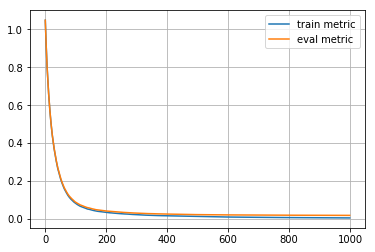

In [0]:

# グラフにプロットする
train_metric = history['learn']['MultiClass']
plt.plot(train_metric, label='train metric')

eval_metric = history['validation']['MultiClass']
plt.plot(eval_metric, label='eval metric')

plt.legend()
plt.grid()
plt.show()

In [0]:
# 特徴量の重要度を取得する
feature_importance = model.get_feature_importance()


In [0]:
#print(dataset.feature_names)
print(feature_importance)

[3.07913121e-01 5.76192951e+00 2.76399207e+01 0.00000000e+00
 0.00000000e+00 1.88819750e+01 7.58849927e+00 3.88690569e+01
 9.48802428e-01 0.00000000e+00 1.90312640e-03 0.00000000e+00]


In [0]:

# 棒グラフとしてプロットする
plt.figure(figsize=(12, 12))
plt.barh(range(len(feature_importance)),
            feature_importance,
            tick_label=dataset.feature_names)

plt.xlabel('importance')
plt.ylabel('features')
plt.grid()
plt.show()

AttributeError: ignored

<Figure size 864x864 with 0 Axes>